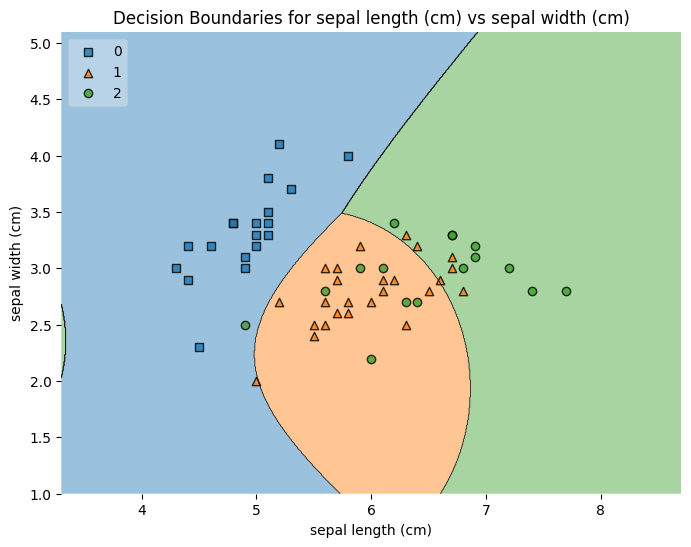

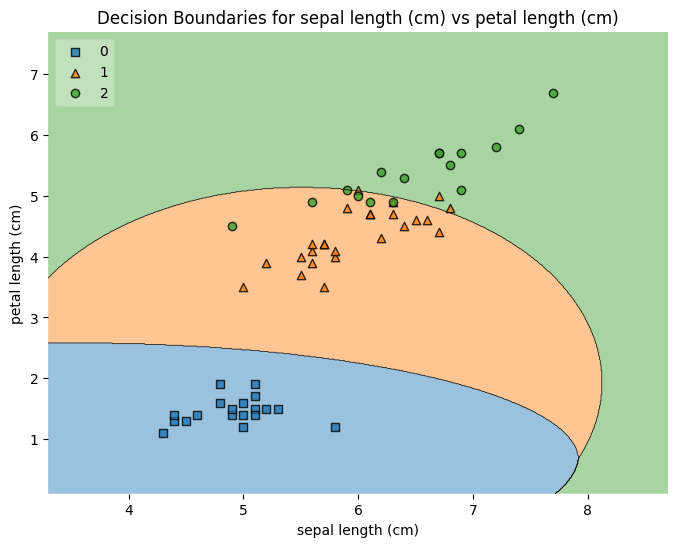

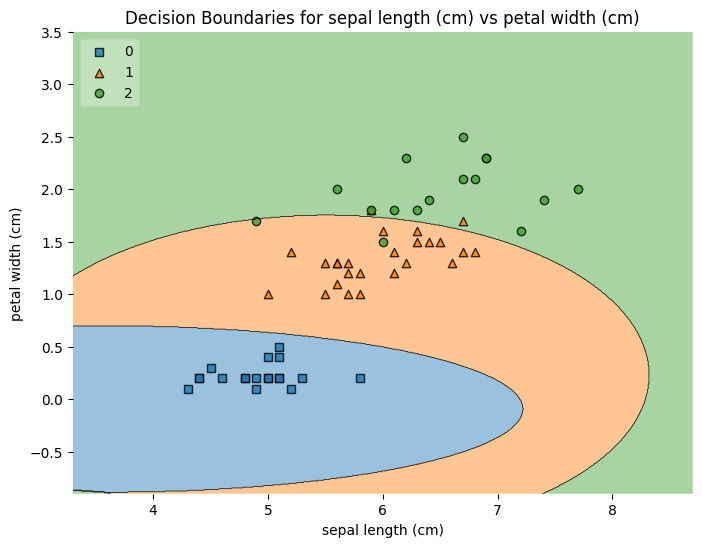

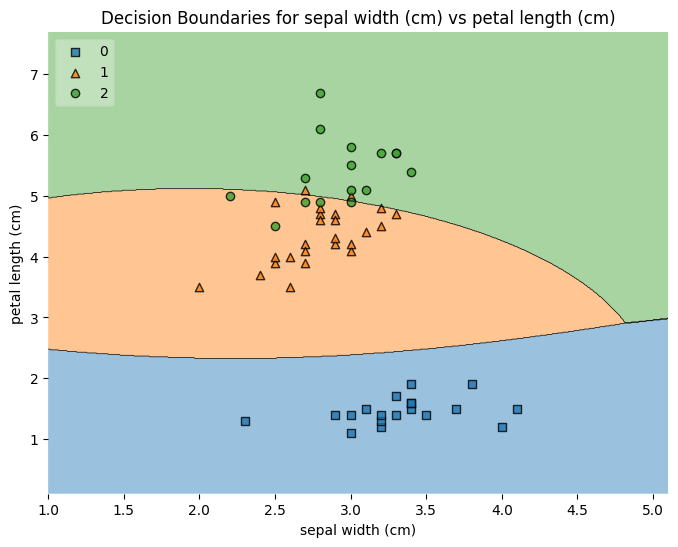

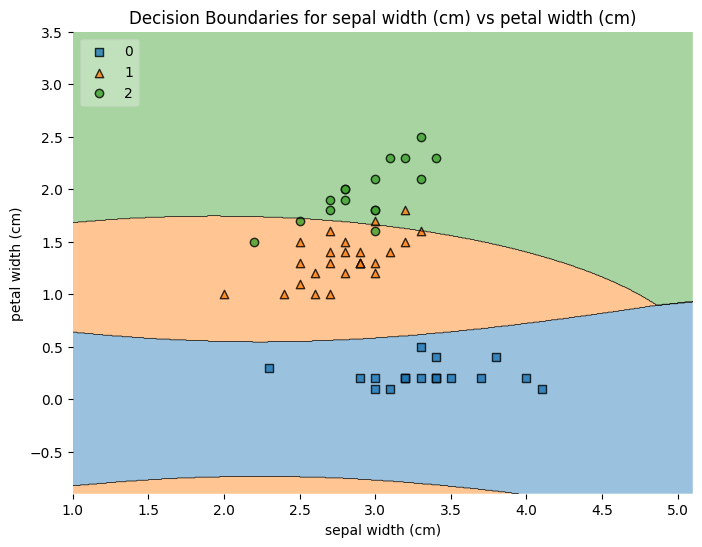

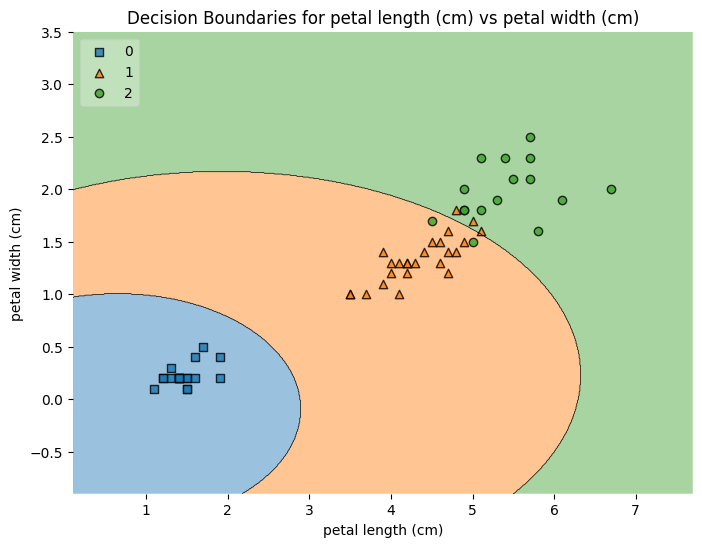

Validation Accuracy: 100.0
Test Accuracy: 95.55555555555556


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from itertools import combinations
from mlxtend.plotting import plot_decision_regions

data = load_iris()
X, y = data.data, data.target 

def train_validate_test_split(X, y, test_ratio=0.3, val_ratio=0.3):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    test_size = int(len(indices) * test_ratio)
    val_size = int(len(indices) * val_ratio)
    
    test_indices = indices[:test_size]
    val_indices = indices[test_size:test_size + val_size]
    train_indices = indices[test_size + val_size:]
    
    X_train, X_val, X_test = X[train_indices], X[val_indices], X[test_indices]
    y_train, y_val, y_test = y[train_indices], y[val_indices], y[test_indices]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split(X, y)

def plot_decision_boundary_for_feature_pair(X, y, feature_pair, feature_names):
    X_pair = X[:, feature_pair]

    model = GaussianNB()
    model.fit(X_pair, y)
    
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_pair, y, clf=model, legend=2)
    plt.xlabel(feature_names[feature_pair[0]])
    plt.ylabel(feature_names[feature_pair[1]])
    plt.title(f'Decision Boundaries for {feature_names[feature_pair[0]]} vs {feature_names[feature_pair[1]]}')
    plt.show()

feature_names = data.feature_names

for feature_pair in combinations(range(X.shape[1]), 2):
    plot_decision_boundary_for_feature_pair(X_train, y_train, feature_pair, feature_names)

def calculate_accuracy(y_pred, y_true):
    acc = np.sum(y_pred == y_true) / len(y_true)
    return acc * 100

model = GaussianNB()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

val_accuracy = calculate_accuracy(y_val_pred, y_val)
test_accuracy = calculate_accuracy(y_test_pred, y_test)

print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)